## Bioscience Reserach- Neuron Groups

### Author : Sarvesh Naik


In [57]:
# Load in necessary packages
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')


### Loading the neurons group 1.csv dataset into Python as a pandas DataFrame.

In [58]:
file_path = "C:/SARVESH/Study Material/UCD/Autumn/STAT40800 Data Programming with Python/"
df = pd.read_csv(file_path + 'neurons_group_1.csv') #reading the csv data file as dataframe
df.head() #Displaying the top 5 rows of the dataset

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume
0,484775243,0.195628,90.3529,548.798070,257.109717,128.269219,3658.629571,2252.681880,115.626135
1,485996843,0.457635,87.0383,717.408343,199.214267,430.635072,4158.819949,5944.196007,730.014704
2,486041253,0.295455,75.3286,584.083922,386.076695,502.033948,2667.618389,2472.795020,197.063796
3,491119181,0.414033,89.0718,284.641670,239.492610,383.828302,1543.941010,2008.838025,237.466517
4,491119245,0.201323,44.5237,302.038542,323.493562,120.229052,1621.871325,1027.220686,54.521240


#### Inspecting the data. How many neurons are included in this dataset? How many different measurements are included? Does this dataset contain any missing values?

In [59]:
x=df.shape[0]#Counting the number of neurons included in the dataset
print("The number of neurons included in the dataset are",x)

The number of neurons included in the dataset are 311


In [60]:
x=df.columns[1:] #Getting column names from index 1 to last because index 0 column is ID of neurons
print(x,"\n\n There are 8 different measurements included.")


Index(['average_diameter', 'overall_depth', 'overall_height', 'overall_width',
       'soma_surface', 'total_length', 'total_surface', 'total_volume'],
      dtype='object') 

 There are 8 different measurements included.


In [61]:
df.isna().sum() #Calculating sum of NA data in the dataset

id                  0
average_diameter    0
overall_depth       0
overall_height      0
overall_width       0
soma_surface        0
total_length        0
total_surface       0
total_volume        0
dtype: int64

As seen there are no missing values in the dataset.

#### Performing an exploratory data analysis, creating both numerical and graphical summaries of the data. 

In [62]:
num_df = df.drop('id', axis=1) #Removing id column and creating new dataframe for numerical summary
num_df[0:].describe() #.describe() to get statistical symmary for each measurement column

,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,0.421175,91.967024,523.516774,320.548089,361.849689,3792.940198,5492.737135,808.488483
std,0.159435,35.658760,299.256684,124.039953,253.912293,2775.993259,5719.713426,1190.466808
min,0.053899,22.680000,82.836871,49.173247,2.895610,251.987893,402.242787,4.309842
25%,0.322128,64.574450,328.964661,233.480547,176.194233,2237.031837,2253.626506,197.071679
50%,0.415613,86.212200,469.151885,291.532148,311.568275,2946.858866,3636.755377,407.180171
75%,0.527572,115.566350,651.885452,392.534334,478.796933,4085.692910,5895.663836,833.681728
max,1.156730,183.960000,1928.118350,827.752239,1283.720986,15697.415190,37182.284100,8482.061401


Text(0.5, 1.0, 'Total volume')

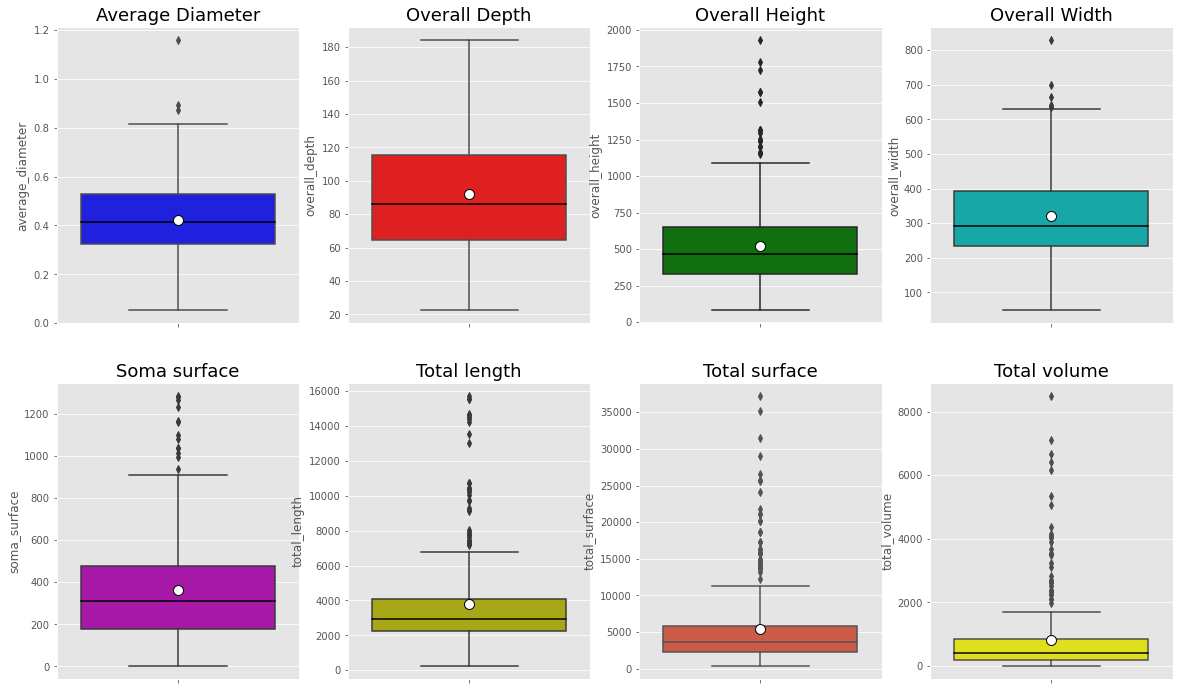

In [63]:
fig = plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
sns.boxplot(data=num_df, y="average_diameter",showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"},
            medianprops={"color": "black"},color='b')
plt.title('Average Diameter',size=18)

plt.subplot(2,4,2)
sns.boxplot(data=num_df, y="overall_depth",showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"},
           medianprops={"color": "black"},color='r')
plt.title('Overall Depth',size=18)

plt.subplot(2,4,3)
sns.boxplot(data=num_df, y="overall_height",showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"},
           medianprops={"color": "black"},color='g')
plt.title('Overall Height',size=18)

plt.subplot(2,4,4)
sns.boxplot(data=num_df, y="overall_width",showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"},
           medianprops={"color": "black"},color='c')
plt.title('Overall Width',size=18)

plt.subplot(2,4,5)
sns.boxplot(data=num_df, y="soma_surface",showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"},
           medianprops={"color": "black"},color='m')
plt.title('Soma surface',size=18)

plt.subplot(2,4,6)
sns.boxplot(data=num_df, y="total_length",showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"},
           medianprops={"color": "black"},color='y')
plt.title('Total length',size=18)

plt.subplot(2,4,7)
sns.boxplot(data=num_df, y="total_surface",showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
plt.title('Total surface',size=18)

plt.subplot(2,4,8)
sns.boxplot(data=num_df, y="total_volume",showmeans=True,meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"},
           medianprops={"color": "black"},color='yellow')
plt.title('Total volume',size=18)


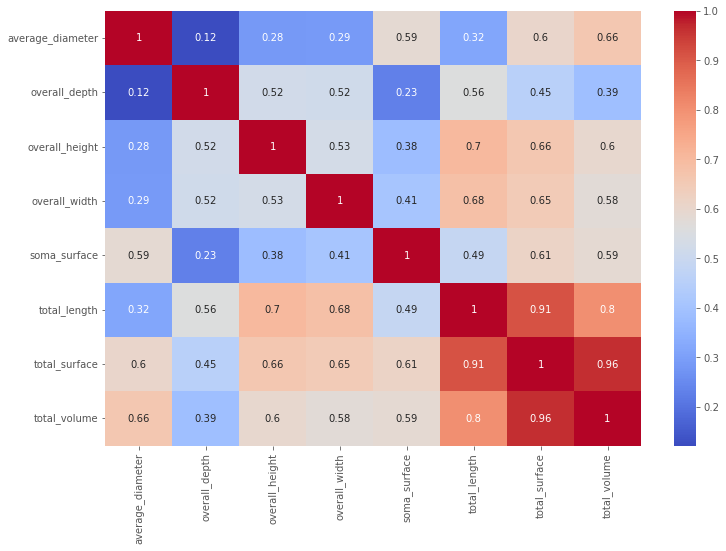

In [64]:
corr_matrix = num_df.corr()
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.show()

1) The columns "overall_height", "soma_surface", "total_length", "total_surface", "total_volume" are outliers in the dataset.It is because their maximum values are highly larger than their 75th percentile values.

2) As seen from the above boxplots, the MEAN of the data for every column is greater than their respective MEDIAN values.

3) From the boxplot and numerical summary it can also be infered that the column 'average_diameter' has an equally spaced out dataset. 

3) The correlation plot is shown. We can see that all the variables have a positive correlation with each other. We also see that total_surface has a strong correlation with total_volume(0.96) and total_length(0.91). overall_depth and average_diameter have the worst correlation - 0.12. 

#### Loading the neurons group 2.csv dataset into Python as a pandas DataFrame.

In [65]:
df2 = pd.read_csv(file_path + 'neurons_group_2.csv') #reading the csv data file as dataframe
df2.head() #Displaying the top 5 rows of the dataset

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume
0,397905347,0.316091,117.5429,585.602322,287.122628,268.777679,3498.090031,3523.606841,306.290931
1,491119234,0.331268,81.9012,461.280515,275.146120,551.788645,2008.302439,2097.688550,188.431435
2,491119269,0.139015,57.5697,324.422347,280.851229,50.092109,1774.258366,776.076427,25.733000
3,491119394,0.230412,76.0357,368.298267,251.377567,244.457685,1650.188964,1198.531518,75.823080
4,491119419,0.321163,98.8344,417.890620,193.590563,252.423672,2066.369729,2085.789861,180.446414


#### Inspecting the data. How many neurons are included in this dataset? 

In [66]:
x=df2.shape[0]#Counting the number of neurons included in the dataset
print("The number of neurons included in the dataset are",x)

The number of neurons included in the dataset are 390


In [67]:
x=df2.columns[1:] #Getting column names from index 1 to last because index 0 column is ID of neurons
print(x,"\n\nThe 8 measurements made for neurons group 2 are the same as in neurons group 1 csv.")

Index(['average_diameter', 'overall_depth', 'overall_height', 'overall_width',
       'soma_surface', 'total_length', 'total_surface', 'total_volume'],
      dtype='object') 

The 8 measurements made for neurons group 2 are the same as in neurons group 1 csv.


- From the obseravtions made, it can be concluded that number of neurons included(390) and different measurements taken(8) are same for both the neuron group 1 and neuron group 2 datasets.

#### Performing a t-test, for each of the measurements, to test whether any of the neuron properties differ between the group 1 and group 2. Use a significance level of α =0.01.

In [68]:
# Two-Tailed t-test for Average diameter.

p1 = df['average_diameter'] #assigning data from neurons group 1 to a parameter
p2 = df2['average_diameter'] #assigning data from neuron group 2 to a parameter

res = ttest_ind(p1, p2) # Function ttest_ind() takes two samples of same size and produces a tuple of t-statistic and p-value.
p_value= res.pvalue # res.pvalue used to get the pvalue only.

print(res)

alpha = 0.01 # alpha given =0.01 

if p_value<=alpha:

    print('\n Conclusion: Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''\n We reject the null hypothesis H0.'''%alpha)

else:

    print('\n Conclusion:  Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,' \n We do not reject the null hypothesis H0.')


Ttest_indResult(statistic=-1.1970075781748382, pvalue=0.23170939849935634)

 Conclusion:  Since p-value(=0.231709) > alpha(=0.01)  
 We do not reject the null hypothesis H0.


- We can confirm that neuron properties for average_diameter do not differ between group1 and group2.

In [69]:
# Two-Tailed t-test for Overall Depth.

p1 = df['overall_depth'] #assigning data from neurons group 1 to a parameter
p2 = df2['overall_depth'] #assigning data from neuron group 2 to a parameter

res = ttest_ind(p1, p2)# Function ttest_ind() takes two samples of same size and produces a tuple of t-statistic and p-value.
p_value= res.pvalue # res.pvalue used to get the pvalue only.


print(res)

alpha = 0.01 # alpha given =0.01 

if p_value<=alpha:

    print('\n Conclusion: Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''\n We reject the null hypothesis H0.'''%alpha)

else:

    print('\n Conclusion:  Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,' \n We do not reject the null hypothesis H0.')


Ttest_indResult(statistic=-1.1857230913955603, pvalue=0.23613458215666971)

 Conclusion:  Since p-value(=0.236135) > alpha(=0.01)  
 We do not reject the null hypothesis H0.


- We can confirm that neuron properties for overall_depth do not differ between group1 and group2.

In [70]:
# Two-Tailed t-test for Overall Height.

p1 = df['overall_height'] #assigning data from neurons group 1 to a parameter
p2 = df2['overall_height'] #assigning data from neuron group 2 to a parameter

res = ttest_ind(p1, p2)# Function ttest_ind() takes two samples of same size and produces a tuple of t-statistic and p-value.
p_value= res.pvalue# res.pvalue used to get the pvalue only.


print(res)

alpha = 0.01 # alpha given =0.01 

if p_value<=alpha:

    print('\n Conclusion: Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''\n We reject the null hypothesis H0.'''%alpha)

else:

    print('\n Conclusion:  Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,' \n We do not reject the null hypothesis H0.')


Ttest_indResult(statistic=0.5860348440044614, pvalue=0.5580412742530052)

 Conclusion:  Since p-value(=0.558041) > alpha(=0.01)  
 We do not reject the null hypothesis H0.


- We can confirm that neuron properties for overall_height do not differ between group1 and group2.


In [71]:
# Two-Tailed t-test for Overall Width.

p1 = df['overall_width'] #assigning data from neurons group 1 to a parameter
p2 = df2['overall_width']  #assigning data from neuron group 2 to a parameter


res = ttest_ind(p1, p2)# Function ttest_ind() takes two samples of same size and produces a tuple of t-statistic and p-value.
p_value= res.pvalue# res.pvalue used to get the pvalue only.


print(res)

alpha = 0.01 # alpha given =0.01 

if p_value<=alpha:

    print('\n Conclusion: Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''\n We reject the null hypothesis H0.'''%alpha)

else:

    print('\n Conclusion:  Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,' \n We do not reject the null hypothesis H0.')


Ttest_indResult(statistic=-0.9231920391791176, pvalue=0.3562256919514518)

 Conclusion:  Since p-value(=0.356226) > alpha(=0.01)  
 We do not reject the null hypothesis H0.


- We can confirm that neuron properties for overall_width do not differ between group1 and group2.


In [72]:
# Two-Tailed t-test for Soma surface.

p1 = df['soma_surface'] #assigning data from neurons group 1 to a parameter
p2 = df2['soma_surface'] #assigning data from neuron group 2 to a parameter


res = ttest_ind(p1, p2)# Function ttest_ind() takes two samples of same size and produces a tuple of t-statistic and p-value.
p_value= res.pvalue# res.pvalue used to get the pvalue only.


print(res)

alpha = 0.01 # alpha given =0.01 

if p_value<=alpha:

    print('\n Conclusion: Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''\n We reject the null hypothesis H0.'''%alpha)

else:

    print('\n Conclusion:  Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,' \n We do not reject the null hypothesis H0.')


Ttest_indResult(statistic=-0.547797643314149, pvalue=0.5840057333717408)

 Conclusion:  Since p-value(=0.584006) > alpha(=0.01)  
 We do not reject the null hypothesis H0.


- We can confirm that neuron properties for soma_surface do not differ between group1 and group2.


In [73]:
# Two-Tailed t-test for Total length.

p1 = df['total_length'] #assigning data from neurons group 1 to a parameter
p2 = df2['total_length'] #assigning data from neuron group 2 to a parameter


res = ttest_ind(p1, p2)# Function ttest_ind() takes two samples of same size and produces a tuple of t-statistic and p-value.
p_value= res.pvalue# res.pvalue used to get the pvalue only.


print(res)

alpha = 0.01 # alpha given =0.01 

if p_value<=alpha:

    print('\n Conclusion: Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''\n We reject the null hypothesis H0.'''%alpha)

else:

    print('\n Conclusion:  Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,' \n We do not reject the null hypothesis H0.')


Ttest_indResult(statistic=-0.332599650604377, pvalue=0.7395362277560685)

 Conclusion:  Since p-value(=0.739536) > alpha(=0.01)  
 We do not reject the null hypothesis H0.


- We can confirm that neuron properties for total_length do not differ between group1 and group2.

In [74]:
# Two-Tailed t-test for Total Surface.

p1 = df['total_surface'] #assigning data from neurons group 1 to a parameter
p2 = df2['total_surface'] #assigning data from neuron group 2 to a parameter


res = ttest_ind(p1, p2)# Function ttest_ind() takes two samples of same size and produces a tuple of t-statistic and p-value.
p_value= res.pvalue# res.pvalue used to get the pvalue only.


print(res)

alpha = 0.01 # alpha given =0.01 

if p_value<=alpha:

    print('\n Conclusion: Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''\n We reject the null hypothesis H0.'''%alpha)

else:

    print('\n Conclusion:  Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,' \n We do not reject the null hypothesis H0.')


Ttest_indResult(statistic=-0.8152397825540432, pvalue=0.4152127535605644)

 Conclusion:  Since p-value(=0.415213) > alpha(=0.01)  
 We do not reject the null hypothesis H0.


- We can confirm that neuron properties for total_surface do not differ between group1 and group2.


In [75]:
# Two-Tailed t-test for Total Volume.

p1 = df['total_volume'] #assigning data from neurons group 1 to a parameter
p2 = df2['total_volume'] #assigning data from neuron group 2 to a parameter


res = ttest_ind(p1, p2)# Function ttest_ind() takes two samples of same size and produces a tuple of t-statistic and p-value.
p_value= res.pvalue# res.pvalue used to get the pvalue only.


print(res)

alpha = 0.01 # alpha given =0.01 

if p_value<=alpha:

    print('\n Conclusion: Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''\n We reject the null hypothesis H0.'''%alpha)

else:

    print('\n Conclusion:  Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,' \n We do not reject the null hypothesis H0.')


Ttest_indResult(statistic=-0.9313735524535135, pvalue=0.35198192808008355)

 Conclusion:  Since p-value(=0.351982) > alpha(=0.01)  
 We do not reject the null hypothesis H0.


- We can confirm that neuron properties for total_volume do not differ between group1 and group2.


#### Loading the neurons additional measurements.csv into Python and combining all three datasets into a single DataFrame.

In [76]:
df3 = pd.read_csv(file_path + 'neurons_additional_measurements.csv') #reading the csv data file as dataframe
df3.head() #Displaying the top 5 rows of the dataset

,id,average_bifurcation_angle_local,average_contraction,average_fragmentation,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,number_nodes,number_stems,number_tips
0,491119743,82.727781,0.864267,20.723077,0.964510,6,99.779724,126.593790,33,73,1470,7,40
1,546781359,82.506680,0.903890,105.277778,0.862183,3,432.383110,496.831994,9,23,2011,5,14
2,537042261,77.536678,0.863104,73.666667,0.926633,6,373.630444,436.958952,21,46,3137,4,25
3,689123605,76.583222,0.900537,95.979167,0.942049,11,943.382549,989.448318,24,52,4652,4,28
4,657879305,72.019250,0.873518,47.535714,1.000000,5,186.218009,221.639502,14,32,1406,4,18


In [77]:
grpdf=pd.concat([df,df2]) # Combining neurons group1 and group2 dataframes first

In [78]:
#Combining group1+group2 dataframe with additional measurements dataframe 
#with left join on the id column
dfmain = pd.merge(left=grpdf, right=df3, how='left', left_on='id', right_on='id') 
dfmain.head() #displaying first 5 rows of the dataframe

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume,average_bifurcation_angle_local,...,average_fragmentation,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,number_nodes,number_stems,number_tips
0,484775243,0.195628,90.3529,548.798070,257.109717,128.269219,3658.629571,2252.681880,115.626135,78.026948,...,48.081967,0.866582,7.0,476.921223,550.691106,31.0,70.0,3041.0,8.0,39.0
1,485996843,0.457635,87.0383,717.408343,199.214267,430.635072,4158.819949,5944.196007,730.014704,86.349668,...,52.416667,0.950502,15.0,650.637431,957.710930,30.0,67.0,3271.0,7.0,37.0
2,486041253,0.295455,75.3286,584.083922,386.076695,502.033948,2667.618389,2472.795020,197.063796,71.911353,...,73.821429,0.816243,5.0,477.440600,569.974920,14.0,32.0,2151.0,4.0,18.0
3,491119181,0.414033,89.0718,284.641670,239.492610,383.828302,1543.941010,2008.838025,237.466517,72.177287,...,42.266667,0.822614,4.0,212.448082,249.521471,16.0,35.0,1292.0,3.0,19.0
4,491119245,0.201323,44.5237,302.038542,323.493562,120.229052,1621.871325,1027.220686,54.521240,70.758367,...,39.733333,0.803137,3.0,242.351930,258.868561,15.0,36.0,1397.0,6.0,21.0


In [79]:
print(dfmain.shape)

(701, 21)


In [80]:
dfmain[dfmain.isna().any(axis=1)] #Checking for null values in the dataframe

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume,average_bifurcation_angle_local,...,average_fragmentation,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,number_nodes,number_stems,number_tips
65,495335458,0.351490,119.8840,661.567781,282.513632,757.149016,4369.050037,4815.884601,467.892153,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,556384323,0.243099,93.2400,144.739038,240.796724,51.493435,2148.380228,1645.638196,98.307475,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,610886034,0.470672,70.5379,623.816654,145.074648,230.864586,3313.199086,4897.644156,579.423510,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,653182658,0.480308,40.9819,263.895203,350.833442,438.340660,2402.931982,3636.755377,492.224651,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308,841869334,0.462304,89.3004,585.271698,389.567416,529.311813,6640.732080,9759.033027,1262.798767,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
642,661930435,0.372487,136.3480,278.746352,494.820721,325.694591,5472.333123,6414.673716,604.937112,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
651,669287805,0.482867,69.7698,442.578166,324.459968,609.960522,2818.027682,4289.961763,547.046601,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- From above, we can infer that dataset for 7 neurons are not included in the neurons additional measurements dataset

- We fill the null values with mean of the remaining values as NA values can result in distortion of the data.
This is done below.

In [81]:
dfmain['average_bifurcation_angle_local'].fillna(value=dfmain['average_bifurcation_angle_local'].mean(), inplace=True)
dfmain['average_contraction'].fillna(value=dfmain['average_contraction'].mean(), inplace=True)
dfmain['average_fragmentation'].fillna(value=dfmain['average_fragmentation'].mean(), inplace=True)
dfmain['average_parent_daughter_ratio'].fillna(value=dfmain['average_parent_daughter_ratio'].mean(), inplace=True)
dfmain['max_branch_order'].fillna(value=dfmain['max_branch_order'].mean(), inplace=True)
dfmain['max_euclidean_distance'].fillna(value=dfmain['max_euclidean_distance'].mean(), inplace=True)
dfmain['max_path_distance'].fillna(value=dfmain['max_path_distance'].mean(), inplace=True)
dfmain['number_bifurcations'].fillna(value=dfmain['number_bifurcations'].mean(), inplace=True)
dfmain['number_branches'].fillna(value=dfmain['number_branches'].mean(), inplace=True)
dfmain['number_nodes'].fillna(value=dfmain['number_nodes'].mean(), inplace=True)
dfmain['number_stems'].fillna(value=dfmain['number_stems'].mean(), inplace=True)
dfmain['number_tips'].fillna(value=dfmain['number_tips'].mean(), inplace=True)

#### Computing the Pearson correlation coefficient between each of the measurements and identify which morphological features are strongly correlated. 

In [82]:
def get_redundant_pairs(dfmain):

#We need to remove redundant pairs from the correlation matrix because they will show a correlation on 1
#Get diagonal and lower triangular pairs of correlation matrix
    pairs_drop = set()
    cols = dfmain.columns
    for i in range(0, dfmain.shape[1]):
        for j in range(0, i+1):
            pairs_drop.add((cols[i], cols[j]))
    return pairs_drop

def top_four_correlations(dfmain, n=4):
    corr = dfmain.corr(method='pearson').abs().unstack()
    label_drop = get_redundant_pairs(dfmain)
    corr = corr.drop(labels=label_drop).sort_values(ascending=False)
    return corr[0:n]

print("Four most strongly correlated pairs :-\n")
print(top_four_correlations(dfmain, 4))

Four most strongly correlated pairs :-

number_branches      number_tips        0.998230
number_bifurcations  number_branches    0.997993
total_length         number_nodes       0.996768
number_bifurcations  number_tips        0.992465
dtype: float64


#### Creating scatter plots for the each of the strongly correlated pairs identified.

[Text(0.5, 1.0, 'Number of tips & Number of bifurcations')]

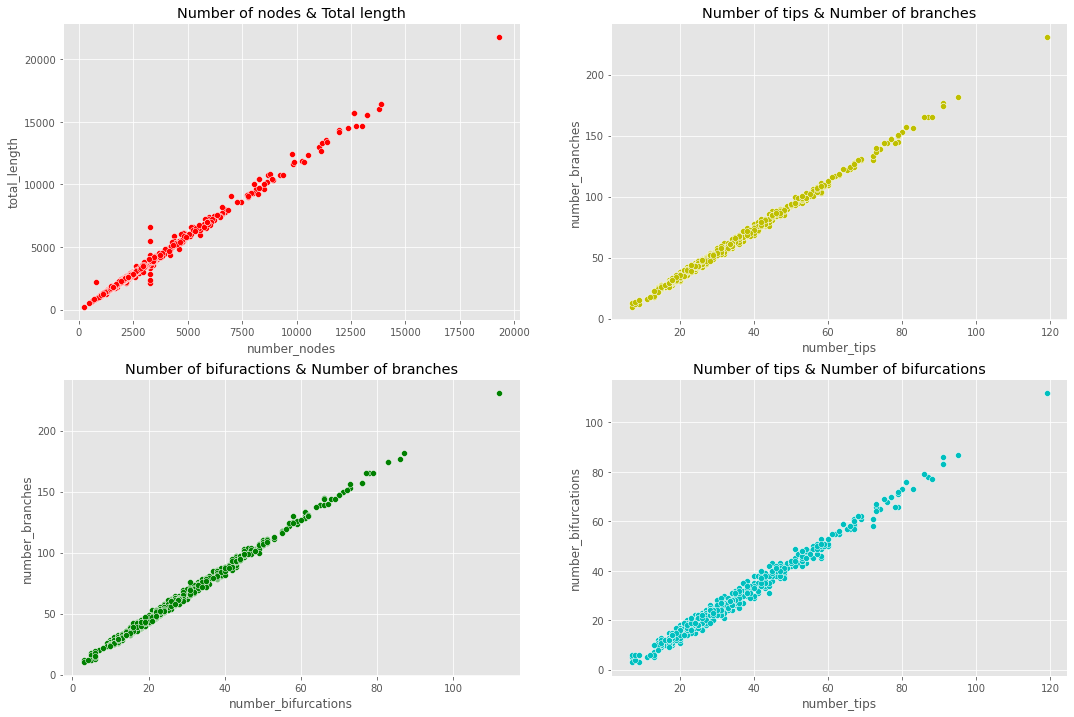

In [83]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

sns.scatterplot(ax=axes[0, 0],x="number_nodes", y="total_length", data=dfmain,color='r').set(title="Number of nodes & Total length")

sns.scatterplot(ax=axes[0, 1],x="number_tips", y="number_branches", data=dfmain,color='y').set(title="Number of tips & Number of branches")

sns.scatterplot(ax=axes[1, 0],x="number_bifurcations", y="number_branches", data=dfmain,color='g').set(title="Number of bifuractions & Number of branches")

sns.scatterplot(ax=axes[1, 1],x="number_tips", y="number_bifurcations", data=dfmain,color='c').set(title="Number of tips & Number of bifurcations")


- As we see from the above relation plots, we see highly positive correlations for the pairs stated above. So yes, the relationships are as expected from the correlation coefficients.

#### Performing Linear regression to predict the total surface area of a neuron (total surface). (Remaining morphological measurements used as predictor variables.)

Separating the data into response and predictor variables and standardise the predictor
variables.

In [84]:
from sklearn import linear_model #loading linear model from SKlearn


In [85]:
#Separating predictor variables and response variable

pred = dfmain.drop(['id','total_surface'], axis=1) #predictor variables

target = dfmain['total_surface'] #response variable


In [86]:
from sklearn import preprocessing #Loading preprocessing package
from sklearn.preprocessing import StandardScaler # Importing StandardScaler for standardizing predictor variables

scale= StandardScaler()
scaled_pred = scale.fit_transform(pred) #Standarized predictor variable

print(scaled_pred)

[[-1.45373396e+00 -9.51052883e-02  1.14805500e-01 ... -9.59379355e-02
   9.83206839e-01  3.40452367e-01]
 [ 1.76163381e-01 -1.87375892e-01  7.14979182e-01 ...  1.91200325e-03
   5.02343170e-01  2.14405985e-01]
 [-8.32727310e-01 -5.13346171e-01  2.40406625e-01 ... -4.74574655e-01
  -9.40247837e-01 -9.83034642e-01]
 ...
 [ 1.57450392e+00  1.30877694e+00  3.37843213e+00 ...  4.50768896e+00
   9.83206839e-01  3.61765830e+00]
 [ 4.44632410e-01  2.20185261e+00  7.83892638e-01 ...  1.10931805e+00
  -4.59384168e-01  1.22277704e+00]
 [ 8.19999076e-01  7.79675486e-01  6.69142977e-01 ... -1.36354214e-01
  -9.40247837e-01 -9.83034642e-01]]


#### Fitting a linear regression model and interpreting the fitted model

In [87]:
x= scaled_pred
y=target

lm = linear_model.LinearRegression()
model = lm.fit(x,y)

predictions = lm.predict(x)
print("The predictions:\n\n",predictions)

R_squared=lm.score(x,y)
print("\n\nThe R-squared value is:",R_squared)

coeff_mat=lm.coef_
print("\n\nThe coefficients for the predictors:",coeff_mat)

intercept=lm.intercept_
print("\n\nThe intercept :",intercept)

MSE = np.square(np.subtract(y,predictions)).mean()
rmse = MSE**0.5
print("\n\nRMSE for the model :",rmse)


The predictions:

 [ 2.69201101e+03  5.43439930e+03  2.51027027e+03  1.94433090e+03
  7.97196096e+02  1.14142960e+02  1.93304936e+03  1.52841562e+03
  2.87255550e+03 -4.93698803e+01  5.01975051e+03  2.40920793e+03
  2.34284875e+03  1.23104791e+03  3.39475090e+03  6.95570762e+02
  1.90796517e+03  2.23239068e+03  3.57839560e+03  2.69646212e+03
  7.32773695e+02  8.80672911e+02  4.57961474e+03  4.33074584e+03
  3.21043248e+03  1.74285812e+03  3.06223444e+03  4.00357661e+03
  2.24517269e+03  4.11383970e+03  1.83863798e+03  3.66159914e+03
  8.49568467e+02  2.42872870e+03  5.04498298e+03  4.73988358e+03
  2.90219365e+03  2.62734028e+03  2.68287267e+03  1.49303506e+03
  2.01637778e+03  9.38713964e+02  1.91652624e+03  2.92332082e+03
  2.49987315e+03  3.22314746e+03  1.70410865e+03  4.70081378e+03
  1.43825134e+03  4.44947014e+03  1.17726153e+03  2.92549832e+03
  5.22269061e+03  1.31545680e+03  7.83489155e+02  3.17236773e+03
  9.97514702e+02  2.37917829e+03  2.71067006e+03  1.72372251e+03
  7.38

Text(0, 0.5, 'Y-Actual')

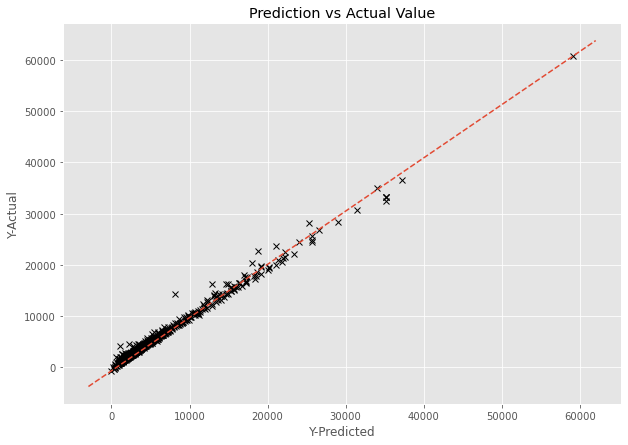

In [88]:
fig = plt.figure(figsize=(10,7))
plt.plot(y,predictions,'kx')
plt.plot(plt.xlim(), plt.ylim(), ls="--")
plt.title("Prediction vs Actual Value")
plt.xlabel("Y-Predicted")
plt.ylabel("Y-Actual")


- From the obseravtions made for the fitted linear model above, we see that the R-squared value is: 0.9916706966133132 and Root mean squared value is 548.782010161307
- The intercept value is 5705.793125477891.
- As the R squared value is over 0.99 and RMSE is also low, we can conclude that the model is well fitted.
- total_lenght and total_volume are the most significant parameters as made out from the coefficient of the predictors.


#### Performing a forward selection Akaike Information Criterion (AIC) regression and examining.

In [89]:
from sklearn.linear_model import LassoLarsIC

In [90]:
reg = linear_model.LassoLarsIC(criterion='aic', normalize=False)
reg.fit(x, y)
LassoLarsIC(criterion='aic', normalize=False)

predictions1 = reg.predict(x)
print("The predictions:\n\n",predictions1)

R_squared1=reg.score(x,y)
print("\n\nThe R-squared value is:",R_squared1)

coeff_mat1=reg.coef_
print("\n\nThe coefficients for the predictors:",coeff_mat1)

intercept1=reg.intercept_
print("\n\nThe intercept :",intercept1)

MSE1 = np.square(np.subtract(y,predictions)).mean()
rmse1 = MSE1**0.5
print("\n\nRMSE for the model :",rmse1)


The predictions:

 [ 2.68619517e+03  5.45629531e+03  2.50260706e+03  1.94424200e+03
  7.96180519e+02  1.17001616e+02  1.92640075e+03  1.52966232e+03
  2.87856485e+03 -6.19462314e+01  5.06624129e+03  2.40185850e+03
  2.34429084e+03  1.24305597e+03  3.39843479e+03  6.87928261e+02
  1.89790694e+03  2.24237275e+03  3.56527127e+03  2.69536761e+03
  7.22763880e+02  8.55178364e+02  4.56476888e+03  4.31051484e+03
  3.18712311e+03  1.72255030e+03  3.04560987e+03  3.98906066e+03
  2.24610414e+03  4.12387566e+03  1.84209772e+03  3.64548260e+03
  8.58713169e+02  2.45692926e+03  5.05687231e+03  4.75122719e+03
  2.91431037e+03  2.62022205e+03  2.69978048e+03  1.50466914e+03
  2.01625267e+03  9.27817105e+02  1.90929421e+03  2.93572481e+03
  2.49092053e+03  3.21419664e+03  1.71582853e+03  4.69194662e+03
  1.46529402e+03  4.46845436e+03  1.17036137e+03  2.98439292e+03
  5.23551095e+03  1.31354892e+03  7.86083633e+02  3.16566292e+03
  1.02215197e+03  2.37549314e+03  2.74118629e+03  1.71240603e+03
  7.27

Text(0, 0.5, 'Y-Actual')

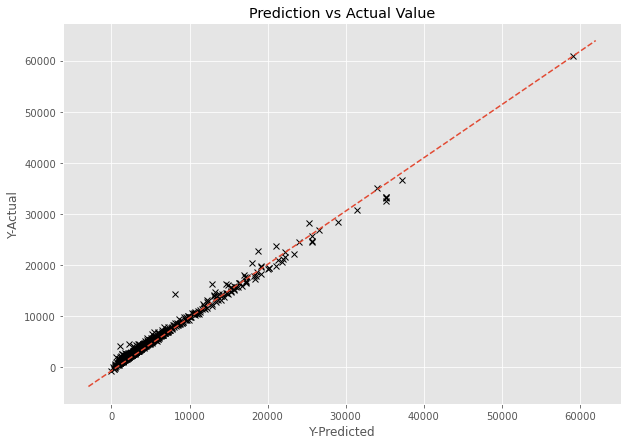

In [91]:
fig = plt.figure(figsize=(10,7))
plt.plot(y,predictions1,'kx')
plt.plot(plt.xlim(), plt.ylim(), ls="--")
plt.title("Prediction vs Actual Value")
plt.xlabel("Y-Predicted")
plt.ylabel("Y-Actual")


- From the obseravtions made for the fitted linear model above, we see that the R-squared value is: 0.9916706966133132 and Root mean squared value is 548.782010161307
- The intercept value is 5705.793125477891
- As the R squared value is over 0.99 and RMSE is also low, we can conclude that the model is well fitted.
- total_lenght and total_volume are the most significant parameters as made out from the coefficient of the predictors.


#### Performing a forward selection Bayes Information Criterion (BIC) regression. Examining the selected model

In [92]:
reg = linear_model.LassoLarsIC(criterion='bic', normalize=False)
reg.fit(x, y)
LassoLarsIC(criterion='bic', normalize=False)

predictions2 = reg.predict(x)
print("The predictions:\n\n",predictions2)

R_squared2=reg.score(x,y)
print("\n\nThe R-squared value is:",R_squared2)

coeff_mat2=reg.coef_
print("\n\nThe coefficients for the predictors:",coeff_mat2)

intercept2=reg.intercept_
print("\n\nThe intercept :",intercept2)

MSE2 = np.square(np.subtract(y,predictions)).mean()
rmse2 = MSE2**0.5
print("\n\nRMSE for the model :",rmse2)


The predictions:

 [ 2.71951236e+03  5.65721176e+03  2.49497976e+03  1.88738245e+03
  7.29401249e+02  1.05502383e+02  1.91059459e+03  1.48271494e+03
  2.73293289e+03 -1.32719608e+02  5.14878983e+03  2.28726661e+03
  2.26696397e+03  1.30801130e+03  3.36154878e+03  6.97054216e+02
  1.91064623e+03  2.23593419e+03  3.45982043e+03  2.62018541e+03
  5.82514973e+02  6.34036404e+02  4.56148397e+03  4.14087604e+03
  3.06231852e+03  1.70393321e+03  2.97571599e+03  3.97988210e+03
  2.13113785e+03  4.13669901e+03  1.87180330e+03  3.66671137e+03
  9.61762450e+02  2.50483891e+03  5.00035208e+03  4.80786354e+03
  2.80139822e+03  2.57532850e+03  2.72659309e+03  1.53773193e+03
  1.92372632e+03  8.08330571e+02  1.88670118e+03  2.92228730e+03
  2.44537553e+03  3.27340558e+03  1.75252364e+03  4.68596737e+03
  1.55242722e+03  4.82179420e+03  1.08397416e+03  3.11469302e+03
  5.31064666e+03  1.28726113e+03  9.89691855e+02  3.20875967e+03
  1.13718257e+03  2.33723009e+03  2.86390351e+03  1.57488161e+03
  6.65

Text(0, 0.5, 'Y-Actual')

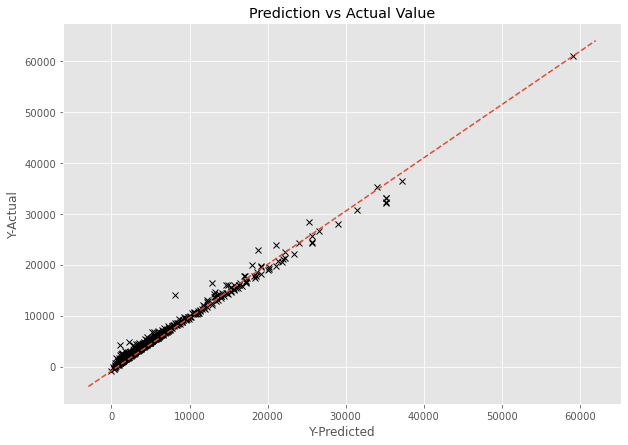

In [93]:
fig = plt.figure(figsize=(10,7))
plt.plot(y,predictions2,'kx')
plt.plot(plt.xlim(), plt.ylim(), ls="--")
plt.title("Prediction vs Actual Value")
plt.xlabel("Y-Predicted")
plt.ylabel("Y-Actual")


- From the obseravtions made for the fitted linear model above, we see that the R-squared value is: 0.9911479771230753 and Root mean squared value is  548.782010161307
- The intercept value is 5705.7931254778905
- As the R squared value is over 0.99 and RMSE is also low, we can conclude that the model is well fitted.
- total_lenght and total_volume are the most significant parameters as made out from the coefficient of the predictors.

- Comparing the two models AIC and BIC, in our obseravtion we can see that the R-squared value of AIC is slightly better than BIC.
- AIC R-squared value is: 0.9916706966133132
- BIC R-squared value is: 0.9911479771230753

How using BIC for model selection differs from using AIC.

- AIC and BIC are both penalized-likelihood criteria. They are usually written in the form [-2logL + kp], where L is the likelihood function, p is the number of parameters in the model, and k is 2 for AIC and log(n) for BIC.
- AIC is an estimate of a constant plus the relative distance between the unknown true likelihood function of the data and the fitted likelihood function of the model, so that a lower AIC means a model is considered to be closer to the truth.
- BIC is an estimate of a function of the posterior probability of a model being true, under a certain Bayesian setup, so that a lower BIC means that a model is considered to be more likely to be the true model.
- Both criteria are based on various assumptions and asymptotic approximations.

#### Random forest regression to predict the total surface area of a neuron (total surface). (Remaining morphological measurements used as predictor variables.)

Spliting the data into appropriate training and test sets.

In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [95]:
X = dfmain.drop(['id','total_surface'], axis=1) #predictor variables

Y = dfmain['total_surface'] #response variable

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.05)

In [97]:
rdf = RandomForestRegressor(n_estimators=10,random_state=101)
rdf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=101)

#### Fitting a random forest regression model with 10 trees using the training data. Including the argument random state=101 in the random forest regression function to ensure reproducible results. 

In [98]:
from sklearn import metrics
rdf = RandomForestRegressor(n_estimators=10,random_state=101,oob_score=True)
rdf.fit(X_train, y_train)

print("Random Forest Model Score (on Train)" , ":" , rdf.score(X_train, y_train)*100 , "," ,
      "Random Forest Model Score (on Test)" ,":" , rdf.score(X_test, y_test)*100)   

y_test_predicted = rdf.predict(X_test)


mse = metrics.mean_squared_error(y_test, y_test_predicted)
rmse = mse**0.5
print("\nRMSE for the model :",rmse)

Random Forest Model Score (on Train) : 99.14610327580598 , Random Forest Model Score (on Test) : 99.84261422957755

RMSE for the model : 209.00218135654765


total_volume                       0.892365
total_length                       0.035483
number_nodes                       0.024684
number_branches                    0.015599
number_tips                        0.014149
number_bifurcations                0.003749
soma_surface                       0.003747
average_parent_daughter_ratio      0.003508
number_stems                       0.001390
overall_width                      0.001239
average_contraction                0.000874
max_path_distance                  0.000576
 average_diameter                  0.000463
overall_depth                      0.000444
max_euclidean_distance             0.000424
overall_height                     0.000382
average_bifurcation_angle_local    0.000361
average_fragmentation              0.000290
max_branch_order                   0.000272
dtype: float64


Text(0.5, 1.0, 'Visualizing Important Variables')

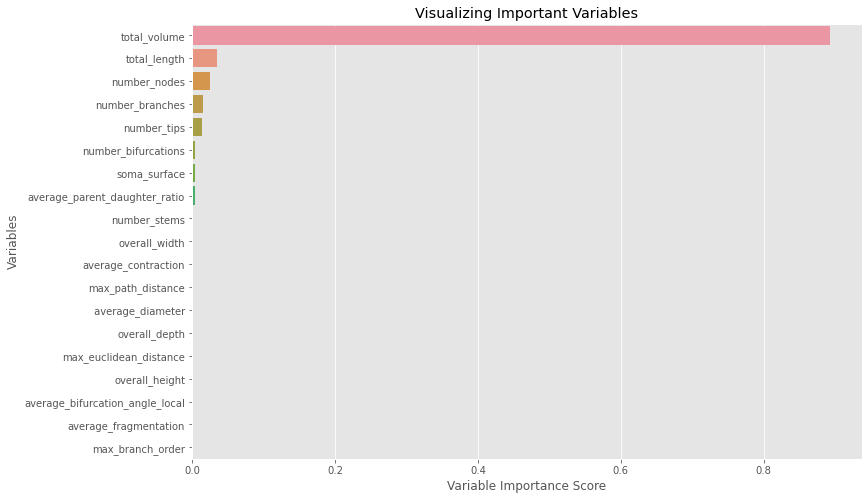

In [99]:
fig = plt.figure(figsize=(12, 8))

variable_imp = pd.Series(rdf.feature_importances_, 
                        index=[' average_diameter', 'overall_depth', 'overall_height', 'overall_width' ,
                               'soma_surface' ,'total_length', 'total_volume', 'average_bifurcation_angle_local' ,
                               'average_contraction' ,'average_fragmentation', 'average_parent_daughter_ratio' ,
                               'max_branch_order', 'max_euclidean_distance', 'max_path_distance', 'number_bifurcations',
                               'number_branches', 'number_nodes', 'number_stems', 'number_tips']).sort_values(ascending=False)
print(variable_imp)

sns.barplot(x=variable_imp, y=variable_imp.index)
plt.xlabel('Variable Importance Score')
plt.ylabel('Variables')
plt.title("Visualizing Important Variables")


- From the above chart and numerical summary it is clear that total_volume , total_lenght are the most important variable features for our model. 
- We see that this was the same case for the linear models in question 4) because these were the same variables which were most significant. 
- If we compare the Random Forest Regression model with the models we fitted to the data in question 4), we observe that the RMSE for the random forest model is more than that observed in question. But this is a very small difference.

#### Using the random forest regression model to predict the total surface area of a neuron for the test set. Creating a scatter plot of the true surface area of a neuron versus the predicted surface area. 

In [100]:
y_test_predicted = rdf.predict(X_test)

Text(0, 0.5, 'Y-Actual')

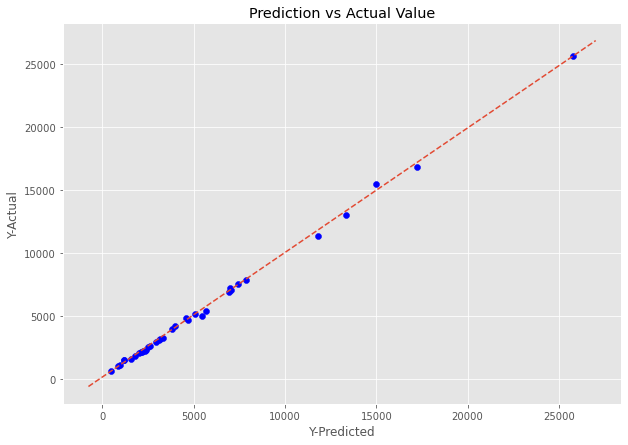

In [101]:
fig = plt.figure(figsize=(10,7))
plt.scatter(y_test, y_test_predicted, color='b')
plt.plot(plt.xlim(), plt.ylim(), ls="--")
plt.title("Prediction vs Actual Value")
plt.xlabel("Y-Predicted")
plt.ylabel("Y-Actual")


- We have the plot of prediction made by Random Forest model for 10 trees. We observe a good prediction with the values very close to the actual value.  

#### Assessing the performance of a random forest regression model with 5, 10, 20, 50, 100, 200, 500 and 1000 trees in predicting the total surface area of a neuron. Repeating the model fit and prediction 30 times for each number of trees, using a different random state for each repeat. 

In [102]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [103]:
import random

mean=[]

estimators=[5,10,20,50,100,200,500,1000]

state = random.sample(range(0, 300), 30)

for i in estimators:
    MSE=[]
    
    for j in range(0,30):
        
        rf = RandomForestRegressor(n_estimators=i ,random_state=state[j])
        rf.fit(X_train, y_train)
        
        y_test_prediction = rf.predict(X_test)
        
        MSE_model = np.mean(pow((y_test_prediction - y_test),2)) 
        MSE.append(MSE_model)
        
    mean.append(np.mean(MSE))

In [48]:
print(mean)

[1679837.3856084016, 1170093.6621623076, 933204.6851730723, 930678.7315502525, 805010.2313771837, 773083.3052907884, 722789.7470658731, 733021.555554492]


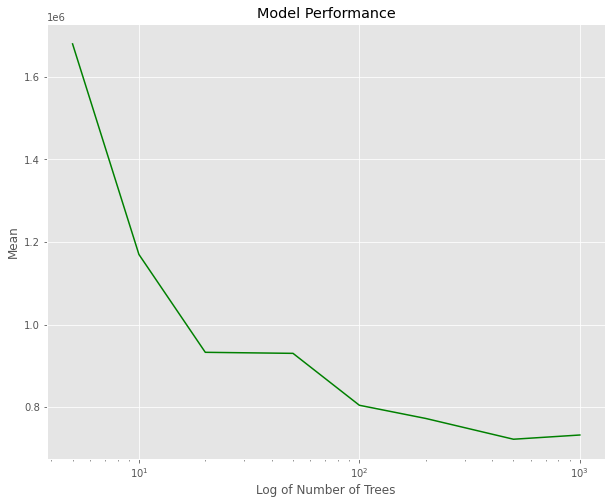

In [49]:
plt.figure(figsize=(10,8))
plt.title("Model Performance")
plt.xlabel("Log of Number of Trees")
plt.ylabel("Mean")
plt.xscale("log")
plt.plot(estimators,mean,color='g')

- From the model performance we can see that the mean of the MSE decreases with the increase in the number of trees. 
- The best performance is seen when the number of trees is 1000. 
- The performance when number of trees are 500 is pretty similiar to the one at when number of trees are 1000 .

### Clustering algorithms to identify different neuron types

#### Performing a k-means cluster analysis, using the morphological measurements as the features. Running the clustering algorithm for different numbers of clusters (integers from 1 to 10). 

In [50]:
from sklearn.cluster import KMeans

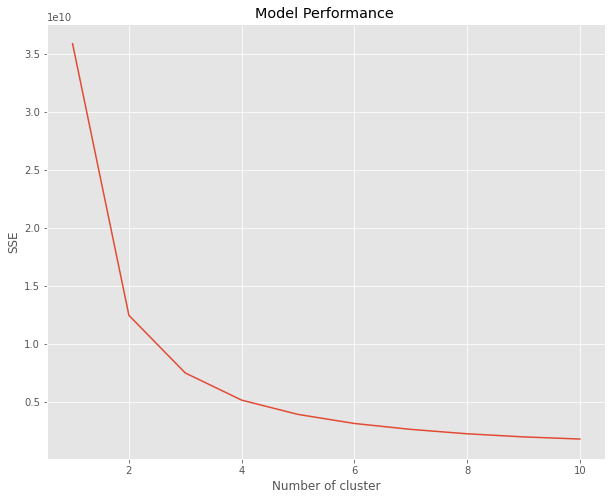

In [51]:
data=dfmain.drop(['id'],axis=1)
data.shape

sse = []
integers=[]

for j in range(1,11):
    kmeans = KMeans(n_clusters=j , init="k-means++" , random_state = 101).fit(data)
    sse.append(kmeans.inertia_) 
    integers.append(j)

    
plt.figure(figsize=(10,8))
plt.plot(integers,sse)
plt.xlabel("Number of cluster")
plt.title("Model Performance ")
plt.ylabel("SSE")
plt.show()



- We can see that the elbow is at k=4, so we can infer that the optimal number clusters for the model is 4.
- We'll take optimal number of clusters as 4 

#### Performing a k-means cluster analysis, using the optimal number of clusters (identified above), and identifying the most discriminatory variables.


In [52]:
kmeans = KMeans(n_clusters=4,init="k-means++", random_state = 101).fit(data)
prediction= kmeans.predict(data)
data['prediction']=prediction

In [115]:
data1=data[data['prediction']==0]
data1=data1.drop(['prediction'],axis=1)

data2=data[data['prediction']==1]
data2=data2.drop(['prediction'],axis=1)

data3=data[data['prediction']==2]
data3=data3.drop(['prediction'],axis=1)

data4=data[data['prediction']==3]
data4=data4.drop(['prediction'],axis=1)


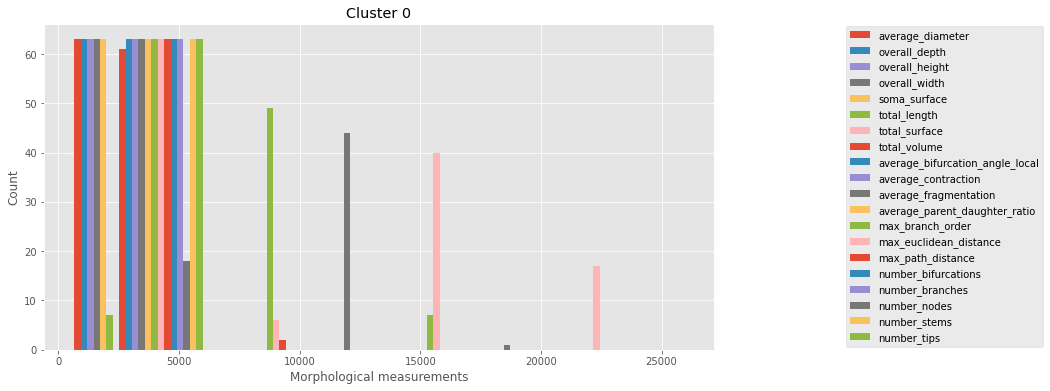

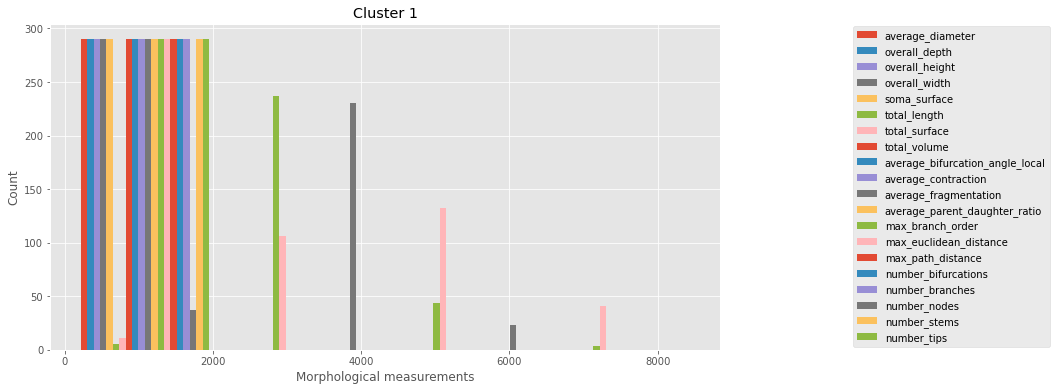

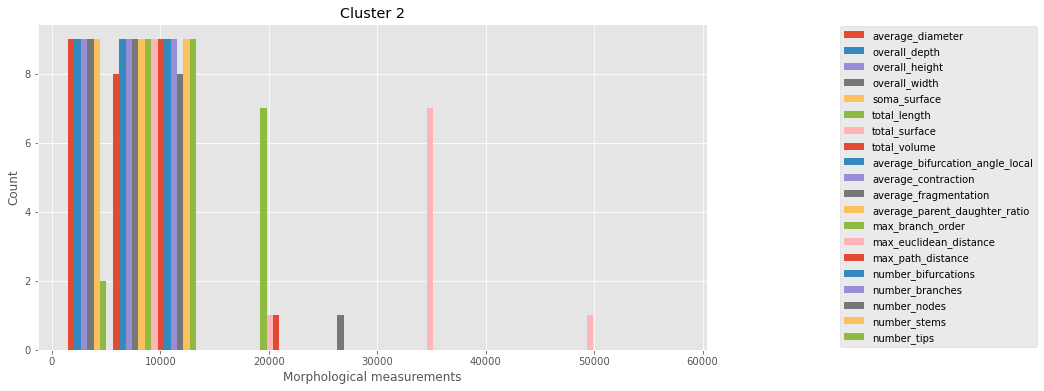

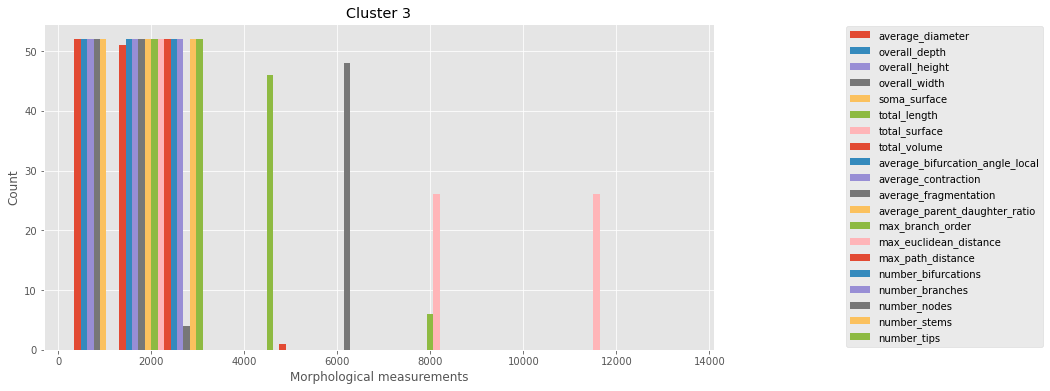

In [116]:
plt.figure(figsize=(12, 6))
plt.hist(data1,bins=4)
plt.xlabel("Morphological measurements")
plt.ylabel("Count")
plt.title("Cluster 0")
plt.legend(data1.columns,loc='center right', bbox_to_anchor=(1.5, 0.5))

plt.figure(figsize=(12, 6))
plt.hist(data2,bins=4)
plt.xlabel("Morphological measurements")
plt.ylabel("Count")
plt.title("Cluster 1")
plt.legend(data2.columns,loc='center right', bbox_to_anchor=(1.5, 0.5))

plt.figure(figsize=(12, 6))
plt.hist(data3,bins=4)
plt.xlabel("Morphological measurements")
plt.ylabel("Count")
plt.title("Cluster 2")
plt.legend(data3.columns,loc='center right', bbox_to_anchor=(1.5, 0.5))

plt.figure(figsize=(12, 6))
plt.hist(data4,bins=4)
plt.xlabel("Morphological measurements")
plt.ylabel("Count")
plt.title("Cluster 3")
plt.legend(data4.columns,loc='center right', bbox_to_anchor=(1.5, 0.5))

- For cluster 0 we see that the variables the variables total_length, total_volume, and number_nodes help to discriminate the neurons.
- For cluster 1 we see that the variables the variables total_length, total_surface, and number_nodes help to discriminate the neurons.
- For cluster 2 we see that the variables the variables total_length, total_volume, and number_nodes help to discriminate the neurons.
- For cluster 3 we see that the variables the variables total_volume and number_nodes help to discriminate the neurons.
- So overall we can infer that the parameters total_length, total_surface, number_nodes , total _volume can be considered as discrimanatory variables. 


#### Creating a series of scatter plots for the most discriminatory variables, colouring the points by cluster number. 

Text(0.5, 1.0, 'Number_nodes vs Total_length')

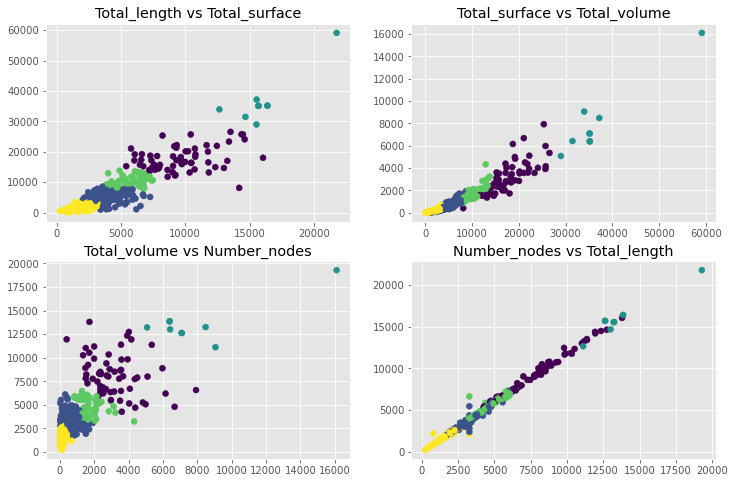

In [117]:
plt.rcParams["figure.figsize"] = (12,8) 

plt.subplot(2,2,1)
x1=[data['total_length']]
y1=[data['total_surface']]
plt.scatter(x1,y1,c=prediction)
plt.title("Total_length vs Total_surface")

plt.subplot(2,2,2)
x2=[data['total_surface']]
y2=[data['total_volume']]
plt.scatter(x2,y2,c=prediction)
plt.title("Total_surface vs Total_volume")

plt.subplot(2,2,3)
x3=[data['total_volume']]
y3=[data['number_nodes']]
plt.scatter(x3,y3,c=prediction)
plt.title("Total_volume vs Number_nodes")

plt.subplot(2,2,4)
x4=[data['number_nodes']]
y4=[data['total_length']]
plt.scatter(x4,y4,c=prediction)
plt.title("Number_nodes vs Total_length")


- From the scatterplots we can see a better representation of our findings in question 6-b).
- We had seen that total_volume and number_nodes were discriminatory variables for all four clusters. In the scatterplots we see clusters for those depicted clearly.

- This proves that we have distinctly different parameters for each neuron. hence we can support the claim multiple categories of neurons, with distinctly different morphological properties, are included in this dataset . 